In [1]:
import pandas as pd
# from tashaphyne.stemming import ArabicLightStemmer
import seaborn as sns
import numpy as np
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Conv1D , GlobalMaxPooling1D , Reshape , Embedding, LSTM, Dense,Bidirectional,Dropout
from deep_translator import GoogleTranslator
from deep_translator.exceptions import RequestError
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from nltk.stem.isri import ISRIStemmer
from sklearn.metrics import f1_score, accuracy_score
import nlpaug.augmenter.word as naw
from sklearn.model_selection import train_test_split

# Telechargement des donnees

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

ID                                            comment  label
0   1  ÿßŸÜÿß ÿßŸàÿµŸä ŸÖŸÜ Ÿáÿ∞ÿß ÿßŸÑŸÖŸÜÿ®ÿ± ÿßŸÑŸÉŸÑ ŸÑŸÑÿ™Ÿàÿ¨Ÿá ÿßŸÑŸâ ŸÖÿ±ÿßŸÉÿ≤ ÿß...      1
1   2  \nŸáŸÜÿßŸÉ ÿßŸÑŸÉÿ´Ÿäÿ± ŸÑÿß ŸäŸÅŸáŸÖ ÿßŸÑŸÖŸÇÿµŸàÿØ ŸÉŸàÿ±ŸàŸÜÿß ŸÑŸäÿ≥ÿ™ ÿµÿπÿ®ÿ©...      1
2   3  ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸá ÿßÿ±ŸÇÿßŸÖ ŸÖŸÇÿ®ŸàŸÑÿ© ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿØŸàŸÑ ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ŸÑŸàŸÑ...      1
3   4  ÿßŸÜÿß ÿ¥ÿÆÿµŸäÿß ÿ£ÿ§ŸäÿØ ŸÖÿß ŸÅÿ±ÿ∂ÿ™Ÿá ÿßŸÑÿ≥ŸÑÿ∑ÿßÿ™ ŸÖŸÜ ÿ∂ÿ±Ÿàÿ±ÿ© ÿßŸÑÿ•ÿØŸÑ...      1
4   5  \nŸÜŸÅÿ≥ ÿßŸÑÿ¥ÿ¶ ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿ®ÿ±ÿ¥ŸäÿØ ŸÖÿ±ÿßŸÉÿ≤ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ŸÖÿ∫ŸÑŸÇÿ© ...      1

In [4]:
chemin_fichier = "stop_words_arabic.txt"

StopWords = []

with open(chemin_fichier, 'r',encoding='utf-8') as fichier:
    StopWords = fichier.readlines()
StopWords = [mot.strip() for mot in StopWords]
StopWords

['ŸÅŸâ',
 'ŸÅŸä',
 'ŸÉŸÑ',
 'ŸÑŸÖ',
 'ŸÑŸÜ',
 'ŸÑŸá',
 'ŸÖŸÜ',
 'ŸáŸà',
 'ŸáŸä',
 'ŸÇŸàÿ©',
 'ŸÉŸÖÿß',
 'ŸÑŸáÿß',
 'ŸÖŸÜÿ∞',
 'ŸàŸÇÿØ',
 'ŸàŸÑÿß',
 'ŸÜŸÅÿ≥Ÿá',
 'ŸÑŸÇÿßÿ°',
 'ŸÖŸÇÿßÿ®ŸÑ',
 'ŸáŸÜÿßŸÉ',
 'ŸàŸÇÿßŸÑ',
 'ŸàŸÉÿßŸÜ',
 'ŸÜŸáÿßŸäÿ©',
 'ŸàŸÇÿßŸÑÿ™',
 'ŸàŸÉÿßŸÜÿ™',
 'ŸÑŸÑÿßŸÖŸÖ',
 'ŸÅŸäŸá',
 'ŸÉŸÑŸÖ',
 'ŸÑŸÉŸÜ',
 'ŸàŸÅŸä',
 'ŸàŸÇŸÅ',
 'ŸàŸÑŸÖ',
 'ŸàŸÖŸÜ',
 'ŸàŸáŸà',
 'ŸàŸáŸä',
 'ŸäŸàŸÖ',
 'ŸÅŸäŸáÿß',
 'ŸÖŸÜŸáÿß',
 'ŸÖŸÑŸäÿßÿ±',
 'ŸÑŸàŸÉÿßŸÑÿ©',
 'ŸäŸÉŸàŸÜ',
 'ŸäŸÖŸÉŸÜ',
 'ŸÖŸÑŸäŸàŸÜ',
 'ÿ≠Ÿäÿ´',
 'ÿßŸÉÿØ',
 'ÿßŸÑÿß',
 'ÿßŸÖÿß',
 'ÿßŸÖÿ≥',
 'ÿßŸÑÿ≥ÿßÿ®ŸÇ',
 'ÿßŸÑÿ™Ÿâ',
 'ÿßŸÑÿ™Ÿä',
 'ÿßŸÉÿ´ÿ±',
 'ÿßŸäÿßÿ±',
 'ÿßŸäÿ∂ÿß',
 'ÿ´ŸÑÿßÿ´ÿ©',
 'ÿßŸÑÿ∞ÿßÿ™Ÿä',
 'ÿßŸÑÿßÿÆŸäÿ±ÿ©',
 'ÿßŸÑÿ´ÿßŸÜŸä',
 'ÿßŸÑÿ´ÿßŸÜŸäÿ©',
 'ÿßŸÑÿ∞Ÿâ',
 'ÿßŸÑÿ∞Ÿä',
 'ÿßŸÑÿßŸÜ',
 'ÿßŸÖÿßŸÖ',
 'ÿßŸäÿßŸÖ',
 'ÿÆŸÑÿßŸÑ',
 'ÿ≠ŸàÿßŸÑŸâ',
 'ÿßŸÑÿ∞ŸäŸÜ',
 'ÿßŸÑÿßŸàŸÑ',
 'ÿßŸÑÿßŸàŸÑŸâ',
 'ÿ®ŸäŸÜ',
 'ÿ∞ŸÑŸÉ',
 'ÿØŸàŸÜ',
 'ÿ≠ŸàŸÑ',
 'ÿ≠ŸäŸÜ',
 'ÿßŸÑŸÅ',
 'ÿßŸÑŸâ',
 'ÿßŸÜŸá',
 'ÿßŸàŸÑ',
 'ÿ∂ŸÖŸÜ',
 'ÿßŸÜŸáÿß',
 'ÿ¨ŸÖŸäÿπ',
 'ÿß

# 

# Pretraitment des donnees

In [5]:
data.isna().sum()

ID         0
comment    0
label      0
dtype: int64

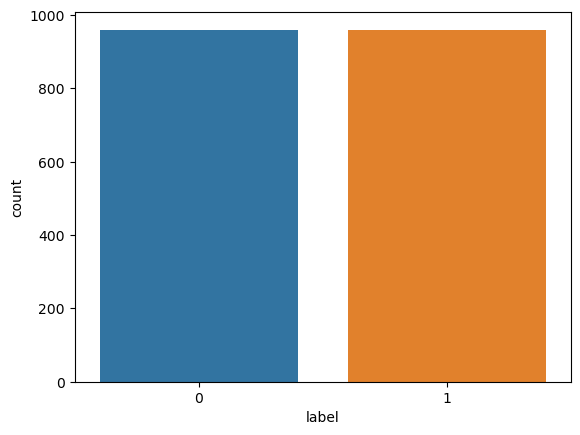

In [6]:
sb = sns.countplot(data,x='label')

In [7]:
data["comment"][0]

'ÿßŸÜÿß ÿßŸàÿµŸä ŸÖŸÜ Ÿáÿ∞ÿß ÿßŸÑŸÖŸÜÿ®ÿ± ÿßŸÑŸÉŸÑ ŸÑŸÑÿ™Ÿàÿ¨Ÿá ÿßŸÑŸâ ŸÖÿ±ÿßŸÉÿ≤ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ÿµÿØŸÇŸàŸÜŸä ÿßŸÑÿßŸÖÿ± ŸÑŸäÿ≥ ŸÖÿ≤ÿ≠ÿ© ÿßŸà ŸÖÿ±ÿ∂ ÿßŸÑÿ≤ŸÉÿßŸÖ ŸáŸà ÿ®ÿßŸÑŸÅÿπŸÑ ŸÖÿ±ÿ∂ ŸÇÿßÿ™ŸÑ ÿßŸÜÿß ÿßŸäÿ∂ÿß ŸÉŸÜÿ™ ŸÖŸÜ ÿßŸÑÿ∞ŸäŸÜ ŸÑÿß Ÿäÿ±ŸäÿØŸàŸÜ ÿßŸÑŸÑŸÇÿßÿ≠ ŸÑŸÉŸÜ ÿπŸÜÿØŸÖÿß ÿßÿµŸäÿ® ÿ≤Ÿàÿ¨ ÿßÿÆÿ™Ÿâ Ÿàÿ¥ÿßŸáÿØÿ™ ÿ≠ÿßŸÑÿ™Ÿá ÿßŸÑÿ™Ÿä ŸàÿµŸÑÿ™ ÿßŸÑŸâ ÿßŸÑŸÖŸàÿ™ ŸÑŸàŸÑÿß ŸÑŸÉŸÅ ÿßŸÑŸÑŸá ÿ®Ÿá ŸÑŸÉÿßŸÜ ÿßŸÑÿßŸÜ ŸÖŸÜ ÿßŸÑŸÖÿ±ÿ≠ŸàŸÖŸäŸÜ ŸàÿπŸÖÿ±Ÿá ŸÅŸä ÿßŸÑÿ´ŸÑÿßÿ´ŸäŸÜŸÑÿß ÿ™ÿµÿØŸÇŸàÿß ÿßŸÑÿ¥ÿßÿ¶ÿπÿßÿ™ ÿ≠ŸàŸÑ ÿßŸÑŸÖÿ±ÿ∂ ŸàÿßŸÜŸá ÿ∫Ÿäÿ± ŸÇÿßÿ™ŸÑ ŸàŸäÿµŸäÿ® ŸÅŸÇÿ∑ ÿßŸÑÿπŸàÿßÿ¨Ÿäÿ≤ Ÿáÿ∞ÿß ŸÉŸÑŸá ŸÉÿ∞ÿ® ÿ®ŸÑ ŸäÿµŸäÿ®ŸâÿßŸä ÿßÿ≠ÿØ ŸàŸäŸÇÿ™ŸÑ ÿ≠ÿ™Ÿâ ÿßÿ¥ÿØ ÿßŸÑŸÜÿßÿ≥ ŸÇŸàÿ©ÿßÿ™ŸÖŸÜŸâ ŸÖŸÜ ÿ®ÿπÿ∂ ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®ÿ© ÿßŸÜ ŸäŸÇÿØŸÖŸàÿß ŸÖÿµŸÑÿ≠ÿ© ÿßŸÑŸÖÿ¨ÿ™ŸÖÿπ ÿπŸÑŸâ ÿßŸÜÿßŸÜŸäÿ™ŸáŸÖ ÿßŸÑÿÆÿßÿµÿ© ŸàŸÉŸÅŸâ ŸÜÿ¥ÿ± ÿ™ÿ±Ÿáÿßÿ™ Ÿàÿ≥ÿÆÿßŸÅÿßÿ™ '

In [8]:


def supprimerCaracteresSpeciaux(df, colonne, caracteres_a_supprimer, remplacement):
    df_copy = df.copy()
    for i in range(len(df_copy[colonne])):
        texte_original = df_copy.at[i, colonne]
        texte_modifie = ""
        for lettre in texte_original:
            if lettre not in caracteres_a_supprimer:
                texte_modifie += lettre
            else:
                texte_modifie += remplacement
        df_copy.at[i, colonne] = texte_modifie
    return df_copy   
        
        
def supprimerStopWord(df, colonne, stopwords_df):
    stopwords_list = StopWords

    for i in range(len(df[colonne])):
        mots = df[colonne][i].split(' ')
        paragraph = " ".join(mot for mot in mots if mot.lower() not in stopwords_list)
        df.loc[i, colonne] = paragraph



def stemming(text):
    st = ISRIStemmer()
    stemmed_words = []
    word_tokens = word_tokenize(text) 
    for w in word_tokens:
        stemmed_words.append(st.stem(w))
    stemmed_words = " ".join(stemmed_words)
    return stemmed_words


def remove_english_characters(text):
        return re.sub(r'[a-zA-Z]+', '', text)

def NormalizeArabic(text):
    text = re.sub("[ÿ•ÿ£Ÿ±ÿ¢ÿß]", "ÿß", text)
    text = re.sub("Ÿâ", "Ÿä", text)
    text = re.sub("ÿ§", "ÿ°", text)
    text = re.sub("ÿ¶", "ÿ°", text)
    text = re.sub("ÿ©", "Ÿá", text)
    return text


In [9]:
caracteres_a_supprimer = ['0','1','2','3','4','5','6','7','8','9','üíïüíâ','#','!', '@', '$', '%', '^', '*', '\n', '\t', '\s', '(', ')', '_', '\-', '+', '=', '|', '?', '>', '.', ',', '[', ']', '{', '}', '`', '~', '\\', '/','ÿõ']
dt=supprimerCaracteresSpeciaux(data, 'comment',caracteres_a_supprimer," ")
supprimerStopWord(dt, 'comment', StopWords)
dt

ID                                            comment  label
0        1  ÿßŸÜÿß ÿßŸàÿµŸä ÿßŸÑŸÖŸÜÿ®ÿ± ÿßŸÑŸÉŸÑ ŸÑŸÑÿ™Ÿàÿ¨Ÿá ŸÖÿ±ÿßŸÉÿ≤ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ÿµÿØŸÇŸà...      1
1        2   ÿßŸÑŸÉÿ´Ÿäÿ± ŸäŸÅŸáŸÖ ÿßŸÑŸÖŸÇÿµŸàÿØ ŸÉŸàÿ±ŸàŸÜÿß ŸÑŸäÿ≥ÿ™ ÿµÿπÿ®ÿ© ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÑ...      1
2        3  ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸá ÿßÿ±ŸÇÿßŸÖ ŸÖŸÇÿ®ŸàŸÑÿ© ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿØŸàŸÑ ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ŸÑŸàŸÑ...      1
3        4  ÿßŸÜÿß ÿ¥ÿÆÿµŸäÿß ÿ£ÿ§ŸäÿØ ŸÅÿ±ÿ∂ÿ™Ÿá ÿßŸÑÿ≥ŸÑÿ∑ÿßÿ™ ÿ∂ÿ±Ÿàÿ±ÿ© ÿßŸÑÿ•ÿØŸÑÿßÿ° ÿ®ÿ¨Ÿà...      1
4        5   ŸÜŸÅÿ≥ ÿßŸÑÿ¥ÿ¶ ŸÖÿØŸäŸÜÿ© ÿ®ÿ±ÿ¥ŸäÿØ ŸÖÿ±ÿßŸÉÿ≤ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ŸÖÿ∫ŸÑŸÇÿ© ÿ•ŸÑŸâ ...      1
...    ...                                                ...    ...
1915  1916   ŸàÿßŸÑŸÑŸá ÿØŸÖÿ±ŸàŸÜÿß Ÿàÿ™ÿπÿØÿßŸà ÿπŸÑŸäŸÜÿß ÿ¥Ÿä ŸÖŸäŸÇÿ±ÿßÿ¥ ÿ¥Ÿä ŸÖŸäÿÆÿØŸÖÿ¥...      0
1916  1917                        ŸÑŸÇÿßÿ≠ ŸÖŸàÿ™ ÿ≥ŸÖ ŸÅŸäŸÇŸà ÿπÿ®ÿßÿØ ÿßŸÑŸÑŸá       0
1917  1918  ÿßŸÑŸÑŸÇÿßÿ≠ ÿ¢ŸÖŸÜÿå ÿ™ÿ¨ÿßŸáŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿ¥ŸáÿßÿØÿßÿ™ ÿßŸÑÿ£ÿ∑ÿ®ÿßÿ° ÿßŸÑÿπÿßŸÑŸÖÿå...      0
1918  1919  ŸÑŸÜŸÉŸÜ ŸàÿßŸÇÿπŸäŸäŸÜ‚Ä¶ŸÑÿß Ÿäÿ¨ÿ® ŸÅÿ±ÿ∏ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ÿ®ÿßŸÑŸÇŸàÿ©  ÿßŸÜÿß ÿ™ŸÑ...      0
1919  1920    ÿßŸÑÿ™ŸÜÿ≥ŸäŸÇŸäÿ© ÿßŸÑŸàÿ∑ŸÜŸäÿ© ŸÑŸÑŸÖÿ∫ÿßÿ±ÿ®ÿ© ÿßŸÑÿ±ÿßŸÅÿ∂ŸäŸÜ ŸÑŸÑÿ™ŸÑŸÇŸäÿ≠ ...      0

[1920 rows x 3 columns]

In [10]:
# # SupprimNombre(dt, 'comment')
# dt = dt.dropna()
# dt

In [11]:
for index, row in dt.iterrows():
    row['comment'] = remove_english_characters(row['comment'])
#     row['comment'] = NormalizeArabic(row['comment'])
#     row['comment'] = stemming(row['comment'])

    new_df = pd.DataFrame({'comment': [row['comment']]}, index=[index])
    dt.update(new_df)
dt

ID                                            comment  label
0        1  ÿßŸÜÿß ÿßŸàÿµŸä ÿßŸÑŸÖŸÜÿ®ÿ± ÿßŸÑŸÉŸÑ ŸÑŸÑÿ™Ÿàÿ¨Ÿá ŸÖÿ±ÿßŸÉÿ≤ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ÿµÿØŸÇŸà...      1
1        2   ÿßŸÑŸÉÿ´Ÿäÿ± ŸäŸÅŸáŸÖ ÿßŸÑŸÖŸÇÿµŸàÿØ ŸÉŸàÿ±ŸàŸÜÿß ŸÑŸäÿ≥ÿ™ ÿµÿπÿ®ÿ© ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÑ...      1
2        3  ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸá ÿßÿ±ŸÇÿßŸÖ ŸÖŸÇÿ®ŸàŸÑÿ© ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ÿØŸàŸÑ ÿßŸÑŸÖŸÜÿ∑ŸÇÿ© ŸÑŸàŸÑ...      1
3        4  ÿßŸÜÿß ÿ¥ÿÆÿµŸäÿß ÿ£ÿ§ŸäÿØ ŸÅÿ±ÿ∂ÿ™Ÿá ÿßŸÑÿ≥ŸÑÿ∑ÿßÿ™ ÿ∂ÿ±Ÿàÿ±ÿ© ÿßŸÑÿ•ÿØŸÑÿßÿ° ÿ®ÿ¨Ÿà...      1
4        5   ŸÜŸÅÿ≥ ÿßŸÑÿ¥ÿ¶ ŸÖÿØŸäŸÜÿ© ÿ®ÿ±ÿ¥ŸäÿØ ŸÖÿ±ÿßŸÉÿ≤ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ŸÖÿ∫ŸÑŸÇÿ© ÿ•ŸÑŸâ ...      1
...    ...                                                ...    ...
1915  1916   ŸàÿßŸÑŸÑŸá ÿØŸÖÿ±ŸàŸÜÿß Ÿàÿ™ÿπÿØÿßŸà ÿπŸÑŸäŸÜÿß ÿ¥Ÿä ŸÖŸäŸÇÿ±ÿßÿ¥ ÿ¥Ÿä ŸÖŸäÿÆÿØŸÖÿ¥...      0
1916  1917                        ŸÑŸÇÿßÿ≠ ŸÖŸàÿ™ ÿ≥ŸÖ ŸÅŸäŸÇŸà ÿπÿ®ÿßÿØ ÿßŸÑŸÑŸá       0
1917  1918  ÿßŸÑŸÑŸÇÿßÿ≠ ÿ¢ŸÖŸÜÿå ÿ™ÿ¨ÿßŸáŸÑ ÿπÿ¥ÿ±ÿßÿ™ ÿ¥ŸáÿßÿØÿßÿ™ ÿßŸÑÿ£ÿ∑ÿ®ÿßÿ° ÿßŸÑÿπÿßŸÑŸÖÿå...      0
1918  1919  ŸÑŸÜŸÉŸÜ ŸàÿßŸÇÿπŸäŸäŸÜ‚Ä¶ŸÑÿß Ÿäÿ¨ÿ® ŸÅÿ±ÿ∏ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ÿ®ÿßŸÑŸÇŸàÿ©  ÿßŸÜÿß ÿ™ŸÑ...      0
1919  1920    ÿßŸÑÿ™ŸÜÿ≥ŸäŸÇŸäÿ© ÿßŸÑŸàÿ∑ŸÜŸäÿ© ŸÑŸÑŸÖÿ∫ÿßÿ±ÿ®ÿ© ÿßŸÑÿ±ÿßŸÅÿ∂ŸäŸÜ ŸÑŸÑÿ™ŸÑŸÇŸäÿ≠ ...      0

[1920 rows x 3 columns]

In [12]:
dt["comment"][1919]

'  ÿßŸÑÿ™ŸÜÿ≥ŸäŸÇŸäÿ© ÿßŸÑŸàÿ∑ŸÜŸäÿ© ŸÑŸÑŸÖÿ∫ÿßÿ±ÿ®ÿ© ÿßŸÑÿ±ÿßŸÅÿ∂ŸäŸÜ ŸÑŸÑÿ™ŸÑŸÇŸäÿ≠ ÿßŸÑÿ•ÿ¨ÿ®ÿßÿ±Ÿä ÿ≥ÿ™ŸÜÿ≤ŸÑ ŸÑŸÑÿ¥ÿßÿ±ÿπ '

# 

# Data Augmentation

In [13]:
# R√©cup√©ration des phrases et labels depuis data
phrases = dt['comment'].tolist()
labels = dt['label'].tolist()

# Initialisation de l'augmenteur de synonymes
aug = naw.SynonymAug(aug_src='wordnet')

# Augmentation des phrases
augmented_phrases = [aug.augment(phrase) for phrase in phrases]

# Cr√©ation de la liste compl√®te de phrases et de labels
all_phrases = phrases + augmented_phrases
all_labels = labels + labels  

# M√©lange al√©atoire des donn√©es
shuffled_indices = np.random.permutation(len(all_phrases))

# Cr√©ation du dataframe pandas avec les donn√©es m√©lang√©es
df = pd.DataFrame({
    'comment': [all_phrases[i] for i in shuffled_indices],
    'label': [all_labels[i] for i in shuffled_indices]
})

caracteres_a_supprimer = ['0','1','2','3','4','5','6','7','8','9','üíïüíâ','#','!','?', '@', '$', '%', '^', '*', '\n', '\t', '\s', '(', ')', '_', '\-', '+', '=', '|', '?', '>', '.', ',', '[', ']', '{', '}', '`', '~', '\\', '/']
df=supprimerCaracteresSpeciaux(df, 'comment',caracteres_a_supprimer," ")
df


comment  label
0     ÿßŸÜÿ™ ÿ≠ÿ± ÿ¨ÿ≥ÿØŸÉ ÿåŸàŸÖŸÜ ÿ≠ŸÇŸÉ ÿ™ŸÖÿ™ŸÜÿπ ÿ≠ŸÇŸÜŸá ÿ®ŸÖŸàÿßÿØ  ŸäÿπŸÑŸÖŸáÿß ...      0
1                            ÿßŸÑŸÑŸÇÿßÿ≠ ÿ∂ÿ±Ÿàÿ±Ÿä ÿßŸÜÿ™Ÿáÿß ÿßŸÑŸÖŸàÿ∂Ÿàÿπ      1
2      ÿßŸÑÿ™ÿ≠ÿßÿØ ÿßŸÑÿßÿ±Ÿàÿ®Ÿä ÿßŸÑŸàŸÑŸäÿßÿ™ ÿßŸÑŸÖÿ™ÿ≠ÿØÿ© ÿ≥Ÿäÿ®ŸÜŸàŸÜ ŸÖÿπŸÖŸÑ ÿßŸÑ...      0
3          ÿ™ÿ∂ÿ±ÿ± Ÿàÿ∞Ÿáÿ® ÿ•ŸÑŸäŸáŸÖ ŸäŸÇŸàŸÑŸàŸÜ ÿßŸÑÿ≥ÿ®ÿ® ŸÖŸÜŸÉ ŸàŸÑŸäÿ≥ ÿßŸÑŸÑŸÇÿßÿ≠      0
4      ÿ±ÿ£ŸäŸä ÿßŸÑŸÖŸÜÿßÿπÿ© ÿßŸÑÿ¨ŸÖÿßÿπŸäÿ© ÿßŸÑÿ≠ŸÑ ÿ™ŸÖŸàŸäŸÑ ÿßŸÑŸÖŸäÿØÿßŸÜ ÿßŸÑÿµÿ≠...      0
...                                                 ...    ...
3835                              ÿßŸÑÿ≠ŸÑ ÿ®ÿ≥Ÿäÿ∑ :  ÿßŸÑŸÑŸÇÿßÿ≠        1
3836  ŸáŸÑ ÿßŸÑÿÆÿ®ÿ± ÿµÿ≠Ÿäÿ≠ Ÿàÿ•ŸÜ ŸÜÿ≥ÿ®ÿ© ŸÉÿ®Ÿäÿ±ÿ© ÿßŸÑŸÖÿ∫ÿßÿ±ÿ®ÿ© ŸàÿÆÿµŸàÿµÿß ŸÉ...      0
3837  Ÿáÿßÿ∞ ÿ≠ŸÇŸàŸÇ ÿßŸÑÿßŸÜÿ≥ÿßŸÜ ÿßŸÑŸÖÿ∫ÿ±ÿ® ÿ®ÿ≤ŸÜÿßÿ≥ÿ© ÿØŸäÿßŸÑ ÿ®ÿµÿ≠ ÿ™ÿ®ÿ™ÿ≤ ÿß...      1
3838  ŸÅŸÑÿß ŸäÿπŸÇŸÑ ÿ¥ÿÆÿµ ÿ£ÿ¥ÿÆÿßÿµ Ÿäÿ¥ŸÉŸÉŸàŸÜ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ŸàŸäŸÑÿπÿ®ŸàŸÜ ÿØŸàÿ± ...      1
3839   ŸäÿπŸÇŸàÿ® ŸÖÿ±ÿßŸÉÿ¥ ŸÇŸàŸÑŸÉ ŸÇŸÖÿ™ ÿ®ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ÿ™ÿ¥ÿπÿ± ÿ®ÿßŸä ÿ¥Ÿäÿ° ŸÑŸä...      0

[3840 rows x 2 columns]

In [14]:
print(all_phrases[1])

 ÿßŸÑŸÉÿ´Ÿäÿ± ŸäŸÅŸáŸÖ ÿßŸÑŸÖŸÇÿµŸàÿØ ŸÉŸàÿ±ŸàŸÜÿß ŸÑŸäÿ≥ÿ™ ÿµÿπÿ®ÿ© ÿßŸÑÿ¥ÿ®ÿßÿ® ŸÑŸÉŸÜŸáÿß ÿµÿπÿ®ÿ© ÿßÿµÿ≠ÿßÿ® ŸÖÿ±ÿ∂ ŸÖÿ≤ŸÖŸÜ ŸÉÿßŸÑÿ≥ŸÉÿ±Ÿä ‚Ä¶  ŸÑŸáÿ∞ÿß ÿßŸÑÿØŸàŸÑÿ© ÿßÿÆÿ™ÿßÿ±ÿ™ ÿ™ŸÜŸÇÿØ ÿßŸÖŸáÿßÿ™ŸÜÿß ÿßÿ®ÿßÿ¶ŸÜÿß ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿ≥ŸÉÿ±Ÿä ŸÇÿßŸÖ ÿ≥ŸäÿπŸÖ ÿßŸÑÿ¨ŸÖŸäÿπ ÿßŸÑÿ≠ŸÇŸäŸÇÿ© Ÿäÿ™ŸÖ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ Ÿäÿ™ŸÖ ŸÖÿ≠ÿßÿµÿ±ÿ© ÿßŸÑŸÅŸäÿ±Ÿàÿ≥ ÿ®ÿßŸÑÿ™ŸÑŸÇŸäÿ≠ ŸäŸÜÿ™ŸáŸä ÿßŸÑŸÖÿ¥ŸÉŸÑ ÿ£ŸÜ ŸäÿπŸÖ ÿßŸÑŸÅŸäÿ±Ÿàÿ≥ ÿßŸÑÿ¥ÿ±ÿßÿ¶ÿ≠ ŸÑŸáÿ∞ÿß ŸÜÿ™ŸÖŸÜŸâ ÿ™ÿ≥ÿ±ÿπ ÿßŸÑÿØŸàŸÑÿ© ŸÖÿÆÿ∑ÿ∑Ÿáÿß ŸÑŸÖÿß ÿ™ÿ£ÿ´Ÿäÿ± ŸÖÿ≠ÿßÿ±ÿ®ÿ© ÿßŸÑŸàÿ®ÿßÿ° ÿßŸÇÿ±ÿ® ŸàŸÇÿ™ ŸÖŸÖŸÉŸÜ ŸÜÿ™ŸÖŸÜŸâ ÿßŸÑŸÑŸá  ÿßŸÑÿ™ŸàŸÅŸäŸÇ ŸÑŸÉŸÑ Ÿäÿ≥ÿßŸáŸÖ ÿ®ÿπŸäÿØ ŸÇÿ±Ÿäÿ® ÿßŸÜÿ¨ÿßÿ≠ ÿßŸÑŸÖŸáŸÖÿ© ÿßŸÑÿ¥ŸÉÿ± ŸÉÿ∞ŸÑŸÉ ŸÑÿµÿßÿ≠ÿ® ÿßŸÑÿ¨ŸÑÿßŸÑÿ© Ÿäÿ®ÿÆŸÑ ŸÑŸÖÿ´ŸÑ ÿßŸÑŸÖÿ®ÿßÿØÿ±ÿ© ÿ≥ÿ™ÿπŸàÿØ ÿ®ÿßŸÑÿµÿ≠ÿ© ÿßŸÑÿπÿßŸÅŸäÿ© ÿ™ÿ≠Ÿäÿ© ŸÑŸÑÿ¥ÿπÿ® ÿßŸÑŸÖÿ∫ÿ±ÿ®Ÿä ÿ∑ŸÜÿ¨ÿ© ÿ•ŸÑŸâ ÿßŸÑ›£ÿ±›£ÿ±ÿßÿ™ 


In [15]:
df['comment'][1919]

'ÿßÿµÿ≠ÿßÿ® ÿßŸÑÿ™ÿπŸÑŸäŸÇÿßÿ™ ÿßŸÑÿ≥ŸÑÿ®Ÿäÿ© ÿ•ŸÜ ÿßŸÅÿ™ÿ±ÿ∂ŸÜÿß ÿ¨ÿØŸÑÿß ÿ£ŸÜ ÿ•ŸÜÿ™ÿßÿ¨ ŸÑŸÇÿßÿ≠ ŸÉŸàÿ±ŸàŸÜÿß ŸÖŸÅŸäÿØ ÿßŸÑÿ±ÿßŸáŸÜ ÿ™ÿØÿπŸàŸÜ ÿ£ŸÜŸáÿß ŸÅÿ±ŸÇÿπÿßÿ™ ŸÅÿßŸÑÿ±ŸáÿßŸÜ ÿ£ŸÉÿ®ÿ± ÿ®ŸÉÿ™Ÿäÿ±: ÿßŸÑŸÖÿ∫ÿ±ÿ® Ÿäÿ±ÿßŸáŸÜ ÿßŸÉÿ™ÿ≥ÿßÿ® ÿÆÿ®ÿ±ÿ© ÿ™ŸÇŸÜŸäÿ© ÿµŸÜÿπ ŸÑŸÇÿßÿ≠ÿßÿ™ ÿßŸÑÿ®ÿ≠ÿ™ ÿßŸÑÿπŸÑŸÖŸä ÿßŸÑŸÖÿ™ÿÆÿµÿµ ÿßŸÑŸÖŸäÿØÿßŸÜ ÿßŸÑÿ™ŸàŸÅÿ± ŸÖŸàÿßÿ±ÿØ ÿ®ÿ¥ÿ±Ÿäÿ© ŸÖÿ§ŸáŸÑÿ© ŸÑÿ∞ŸÑŸÉ ÿßŸÑÿ£ŸáÿØÿßŸÅ ÿßŸÑŸÖÿ™ŸàÿÆÿßÿ© ÿßŸÑÿÆÿ∑Ÿàÿßÿ™ ÿ£ŸÖÿß ÿßŸÑÿ®Ÿäÿπ ÿßŸÑÿ¥ÿ±ÿßÿ° ŸÅŸÑŸÜ Ÿäÿ±ÿ®ÿ≠ ŸÖŸÜŸá ÿßŸÑŸÖÿ∫ÿ±ÿ® ÿßŸÑÿ¥Ÿäÿ° ÿßŸÑŸÉÿ™Ÿäÿ± ŸÑÿ£ŸÜ ŸÖÿ≥ÿßŸáŸÖÿ™Ÿá ÿßŸÑÿ≥ŸÑÿ≥ŸÑÿ© ÿßŸÑŸÇŸäŸÖŸäÿ© ÿ∂ÿπŸäŸÅÿ© ŸÖŸÇÿßÿ±ŸÜÿ© ÿ®ŸÜÿ≥ÿ®ÿ© ÿ™Ÿàÿ∑ŸäŸÜ ÿßŸÑŸÉŸÜÿ™Ÿàÿ¨ ŸÜŸáÿßÿ± ŸäŸàŸÇŸÅ ÿßŸÑŸÖÿ∫ÿ±ÿ® ÿ±ÿ¨ŸÑŸäŸá ÿ™ŸàŸÑŸä ÿπŸÜÿØŸà ‚Äú ÿµŸÜÿπ ÿ®ÿßŸÑŸÖÿ∫ÿ±ÿ® ‚Äù ŸÑŸäÿ≥ŸàŸÜÿ≥ ŸÖÿ∫ÿ±ÿ®Ÿäÿ© ÿØÿßŸÉ ÿ≥ÿßÿπÿßÿ™ Ÿäÿ™ÿ¨ÿ±ÿ£ ŸÖÿÆÿ®ŸàŸÑ ŸÖŸÜŸÉŸÖ ŸáŸÉÿ∞ÿß ÿ™ÿπŸÑŸäŸÇÿßÿ™ ŸàÿßŸÑŸÑŸä ŸÖÿßÿ®ÿ∫ÿßÿ™ÿ¥ ÿ™ŸÅŸáŸÖ ŸÑŸäŸá ŸáÿØŸá ÿßŸÑŸÖÿ≥ÿ£ŸÑÿ© ŸäŸÖÿ¥Ÿä ŸÑŸÉÿ≤ŸÜÿßŸäÿ© ŸÇŸÜŸäÿ∑ÿ±ÿ© ÿ®ÿßÿ¥ Ÿäÿ¥ŸàŸÅ ÿßŸÑÿµŸÜÿßÿπÿßÿ™ ÿßŸÑŸÖÿπŸÇÿØÿ© ŸÑŸÑÿ≥Ÿäÿßÿ±ÿßÿ™ ŸÅŸä

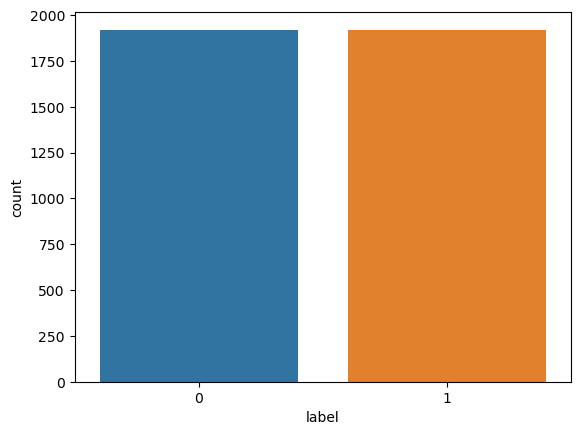

In [16]:
sb = sns.countplot(df,x='label')

In [17]:
X=df['comment']
Y=df['label']
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
x_test

746     ÿßŸÑŸÑŸÇÿßÿ≠ ÿßÿÆÿ∞ÿßŸàŸá ŸàŸÖÿßÿ™Ÿà ŸàÿÆÿ∞ÿßŸàŸá Ÿàÿ™ÿ¥ŸÑŸà ŸàÿØÿßÿ®ÿß ÿßÿ¥ ÿÆÿßÿµŸÉ...
3837    Ÿáÿßÿ∞ ÿ≠ŸÇŸàŸÇ ÿßŸÑÿßŸÜÿ≥ÿßŸÜ ÿßŸÑŸÖÿ∫ÿ±ÿ® ÿ®ÿ≤ŸÜÿßÿ≥ÿ© ÿØŸäÿßŸÑ ÿ®ÿµÿ≠ ÿ™ÿ®ÿ™ÿ≤ ÿß...
3218     ŸÑŸÖŸÜ ŸäŸÇŸàŸÑ ÿßŸÑŸÖÿ∫ÿ±ÿ® ŸÉŸàÿ±Ÿäÿß ÿßŸÑÿ¥ŸÖÿßŸÑŸäÿ© ŸÅŸáŸà ÿÆÿßÿ∑ÿ¶  ŸÉŸàÿ±Ÿä...
2778    ŸÖÿπÿßÿØŸÑÿ© ŸÖÿ™ŸÜÿßŸÇÿ∂ÿ© ‚Ä¶ ŸÅŸä Ÿäÿßÿ™Ÿä ÿßŸÑŸÖŸàÿßÿ∑ŸÜŸàŸÜ ŸÑŸÑÿ™ŸÑŸÇŸäÿ≠ ŸÜÿ¨ÿØ...
1904    ÿ®ŸÅÿ∂ŸÑ ÿßŸÑÿ≥Ÿáÿ± ŸàÿßŸÑÿ™ÿ™ÿ®ÿπ ŸÑÿ¨ŸÑÿßŸÑÿ© ÿßŸÑŸÖŸÑŸÉ ÿµÿ≠ÿ© Ÿàÿ£ŸÖŸÜ ÿßŸÑŸÖÿ∫ÿß...
                              ...                        
1018                     ÿ£ÿ≠ÿ≥ŸÜ ÿ™ŸÑŸÇŸäÿ≠ ÿ¨ŸàŸÜÿ≥ŸàŸÜÿå ÿ™ÿ¨ÿ±ÿ®ÿ™Ÿä ÿßŸÑÿÆÿßÿµÿ©
449     ÿπŸÜÿØŸÉŸÖ ŸÅŸáŸÖ ÿ∫ŸÑÿ∑ ÿßŸÑŸÑŸÇÿßÿ≠ ÿßŸÑŸÑŸÇÿßÿ≠ ÿ±ÿßŸá ŸÉÿßŸäŸÖŸÜÿπ ÿßŸÑŸÅŸäÿ±Ÿàÿ≥...
1288                        Ÿäÿ¨ÿ® ŸÖŸÜÿπ ÿßŸÑÿ¨ŸÖÿßŸáŸäÿ± ÿ¨Ÿàÿßÿ≤ ÿßŸÑÿ™ŸÑŸÇŸäÿ≠
376     ÿßŸÑŸÑŸÇÿßÿ≠ Ÿäÿ®ŸÇŸâ ŸÑŸäÿ≥  ÿ•ÿ¨ÿ®ÿßÿ±Ÿä  ŸÑÿßŸÜ ŸÉÿ™Ÿäÿ± ŸÜÿßÿ≥ ÿ™ÿπÿßŸÜŸä ÿ£ŸÖ...
1592    ŸÉŸÅŸâ ÿßÿ≥ÿ™ÿ≠ŸÖÿßÿ± ÿßŸÑŸÜÿßÿ≥ ÿßŸÑŸÇŸàŸÑ ÿ£ŸÜŸáÿß ÿ¢ŸÖŸÜÿ© ŸáŸÑ ŸÇÿßŸÖÿ™ Ÿàÿ≤ÿßÿ±...
Nam

# 

# Tokenisation des donnees

In [18]:

vocab_size = 90000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_labels = np.array(y_train)
testing_labels = np.array(y_test)

In [19]:

# Parameters
embedding_dim = 32
lstm_dim = 128
dense_dim = 24



model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 32)           2880000   
                                                                 
 flatten (Flatten)           (None, 3840)              0         
                                                                 
 dense (Dense)               (None, 64)                245824    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3132097 (11.95 MB)
Trainable params: 3132

In [21]:
N = 10
# l'entrainement du medel
history= model.fit(training_padded, training_labels, epochs = N, validation_data=(testing_padded, testing_labels))

Epoch 1/10


96/96 [==============================] - 4s 30ms/step - loss: 0.8186 - accuracy: 0.6077 - val_loss: 0.5802 - val_accuracy: 0.7331
Epoch 2/10
96/96 [==============================] - 3s 28ms/step - loss: 0.2966 - accuracy: 0.9297 - val_loss: 0.2112 - val_accuracy: 0.9453
Epoch 3/10
96/96 [==============================] - 2s 26ms/step - loss: 0.0632 - accuracy: 0.9951 - val_loss: 0.1430 - val_accuracy: 0.9466
Epoch 4/10
96/96 [==============================] - 3s 29ms/step - loss: 0.0317 - accuracy: 0.9987 - val_loss: 0.1926 - val_accuracy: 0.9323
Epoch 5/10
96/96 [==============================] - 3s 28ms/step - loss: 0.0246 - accuracy: 0.9980 - val_loss: 0.1219 - val_accuracy: 0.9583
Epoch 6/10
96/96 [==============================] - 3s 27ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.1180 - val_accuracy: 0.9505
Epoch 7/10
96/96 [==============================] - 3s 27ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1164 - val_accuracy: 0.9505
Epoch 8/10


In [22]:
y_pred = model.predict(testing_padded)
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(testing_labels, y_pred_binary)
f1 = f1_score(testing_labels, y_pred_binary)

print("Accuracy : {:.2f}%".format(accuracy * 100))
print("F1 Score : {:.2f}%".format(f1*100))

24/24 [==============================] - 0s 2ms/step
Accuracy : 94.01%
F1 Score : 94.25%


In [23]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [25]:
# n=1
new_text =dt["comment"][1]
print('Le reel class est :', dt['label'][1])


new_text_sequence = tokenizer.texts_to_sequences([new_text])
padded_sequence = pad_sequences(new_text_sequence, maxlen=max_length, padding='post')

# Pr√©diction
prediction = model.predict(padded_sequence)

# Affichage de la pr√©diction
print("La classe predite est :", np.round(prediction[0][0]))

Le reel class est : 1
1/1 [==============================] - 0s 87ms/step
La classe predite est : 1.0
